# testingCombinedTailsTrimmingAndAssignments.ipynb
## Marcus Viscardi,    December 05, 2022

There are some questions regarding reads that get called as having zero tails by tailfindr. It seems like ~80% of the 05A standards are called as having ZERO tails, could this be because tailfindr needs some minimum length to recognize the homopolymer stretch?

With this in mind the hope would be that that minimum length is somewhere around the range that the guppy_basecaller is able to pick out! If this is the case, we can use Porechop to remove nano3P adapters, then count the number of actual basecalled A's at the 3' end of standards!!

Ideally, this code should work from base outputs (ie. Porechop trimmed fastq and tailfindr CSVs), b/c this will afford us the most ability to recreate these results in the future. It'll be a bit annoying b/c this will cause a bit of a slowdown due to re-running the same crap over and over, but hopefully it's worthwhile!
- Maybe even start with raw fastqs from guppy, then do the Porechop step from there??
    - No no, this would be a sh!tshow b/c I have to change files in the porechop directory in order to switch between dRNA and Nano3P

In [5]:
import mappy as mp
import numpy as np
import pandas as pd

import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go

import sys, os
sys.path.insert(0, '/data16/marcus/scripts/nanoporePipelineScripts')
from nanoporePipelineCommon import *

sys.path.insert(0, '/data16/marcus/scripts/nanoporePipelineScripts/standardsAlignment')
from standardsAlignment.combiningTrimmingTailsAndAssignments import StdLibrary

pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)

print("imports done.")

imports done.


In [6]:
dRNA = StdLibrary(f"/data16/marcus/nanoporeSoftLinks/221112_nanoporeRun_ENO2RNAStds_dRNA/output_dir", True)

Mapping to adapters named: ['ENO2_finalStandard_00Tail', 'ENO2_finalStandard_05Tail', 'ENO2_finalStandard_10Tail', 'ENO2_finalStandard_15Tail', 'ENO2_finalStandard_30Tail', 'ENO2_finalStandard_60Tail']


Extracting information from Mappy column: 100%|██████████| 51618/51618 [00:01<00:00, 32471.66it/s]
/data16/marcus/scripts/nanoporePipelineScripts/standardsAlignment/combiningTrimmingTailsAndAssignments.py:114: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  self.hit_df['cigar'] = self.hit_df.cigar.str.rsplit(":", 1).str[1]


In [7]:
Nano3p = StdLibrary(f"/data16/marcus/nanoporeSoftLinks/221028_nanoporeRun_ENO2RNAStds_Nano3P/output_dir", False)

Mapping to adapters named: ['ENO2_finalStandard_00Tail', 'ENO2_finalStandard_05Tail', 'ENO2_finalStandard_10Tail', 'ENO2_finalStandard_15Tail', 'ENO2_finalStandard_30Tail', 'ENO2_finalStandard_60Tail']


Extracting information from Mappy column: 100%|██████████| 233693/233693 [00:06<00:00, 37058.53it/s]
/data16/marcus/scripts/nanoporePipelineScripts/standardsAlignment/combiningTrimmingTailsAndAssignments.py:114: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  self.hit_df['cigar'] = self.hit_df.cigar.str.rsplit(":", 1).str[1]


## Next steps:
1. Use the trimmed sequences to assess all the reads that have "0" tail lengths

In [8]:
Nano3p.merge_df.sequence

0         TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTAGCACA...
1         TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...
2         TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...
3         TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTAG...
4         TTTTTTTTAGCACAGCAGCACCCTAGAAGGGCTGAGCTGATTTTAC...
                                ...                        
233673    CAACTTTTTTTTTTTTTTTTTTTAGCACAGCACAGCACAGCACCTA...
233674    TTTTTTTTTTTTTTTAGCACAGCACAGCACAGCACCTAGAAGGGCT...
233675    GTTTTAACTGGCAGCAGAGCACGGACGATAGCTGAGCTGAGTCGGT...
233676    TTTTTAGCACAGCACAGCACAGCACTTATTGCCATTTGCTGAATGG...
233677    TTTTTAGCACAGCACAGCACAGCACTTATTGCCAGCTGGGCGGTAG...
Name: sequence, Length: 233678, dtype: object

In [35]:
Nano3p.hit_df['regex_tail_len'] = Nano3p.hit_df.sequence.str.extract(r"^(T+)")[0].str.len()
Nano3p.hit_df['regex_tail_len'] = Nano3p.hit_df['regex_tail_len'].fillna(0)

Nano3p.hit_df['regex1_tail_len'] = Nano3p.hit_df.sequence.str.extract(r"^.(T+)")[0].str.len()
Nano3p.hit_df['regex1_tail_len'] = Nano3p.hit_df['regex1_tail_len'].fillna(0)

Nano3p.hit_df['regex2_tail_len'] = Nano3p.hit_df.sequence.str.extract(r"^..(T+)")[0].str.len()
Nano3p.hit_df['regex2_tail_len'] = Nano3p.hit_df['regex2_tail_len'].fillna(0)

In [36]:
Nano3p.hit_df

,read_id,assignment,sequence,mappy_hit_obj,q_st,q_en,strand,ctg,ctg_len,r_st,r_en,mlen,blen,mapq,tp,ts,cigar,Unnamed: 0,read_type,tail_start,tail_end,samples_per_nt,tail_length,file_path,perfect_barcode,regex_tail_len,final_tail_len,tail_source,regex1_tail_len,regex2_tail_len
2,ce3360d6-89ac-44fd-8182-00369a35f346,60,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,219\t723\t-\tENO2_finalStandard_60Tail\t662\t1...,219,723,-,ENO2_finalStandard_60Tail,662,117,653,472,532,1,tp:A:P,ts:A:.,83M1D33M3D9M3D12M1I49M1D12M2I1M1D18M1D7M1I15M1...,43007,contains_a_polyT_tail,2085.0,2675.0,9.13,64.60,/data16/marcus/working/221028_nanoporeRun_ENO2...,False,101.0,64.60,tailfindr,100.0,99.0
3,cd9bc58b-1f35-4b34-9462-0c1e13410cde,60,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTAG...,44\t563\t-\tENO2_finalStandard_60Tail\t662\t12...,44,563,-,ENO2_finalStandard_60Tail,662,127,662,485,536,60,tp:A:P,ts:A:.,8M1D4M1D21M2I64M1I65M1D58M1I1M2I23M2D25M1D2M1D...,43006,contains_a_polyT_tail,945.0,1495.0,7.92,69.42,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,44.0,69.42,tailfindr,43.0,42.0
4,9c62cb37-e358-4e6b-87a6-608324c0d44c,15,TTTTTTTTAGCACAGCAGCACCCTAGAAGGGCTGAGCTGATTTTAC...,8\t522\t-\tENO2_finalStandard_15Tail\t662\t127...,8,522,-,ENO2_finalStandard_15Tail,662,127,657,488,530,36,tp:A:P,ts:A:.,54M3D11M2D50M4D1M2D125M3D1M1D63M1I4M1D5M1I7M4D...,43005,contains_no_polyT_tail,NaN,NaN,7.61,0.00,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,8.0,8.00,regex,7.0,6.0
5,089403b0-5366-4327-8bea-212fd9670aa3,60,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,58\t559\t-\tENO2_finalStandard_60Tail\t662\t14...,58,559,-,ENO2_finalStandard_60Tail,662,141,662,461,518,27,tp:A:P,ts:A:.,29M1D17M6D83M1D2M2D51M2D50M3I9M1D2M1D49M2D19M3...,43010,contains_a_polyT_tail,695.0,1365.0,7.85,85.35,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,58.0,85.35,tailfindr,57.0,56.0
6,cfa66ca1-8e2e-43b1-bb6c-6391c5f47084,60,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,49\t592\t-\tENO2_finalStandard_60Tail\t662\t10...,49,592,-,ENO2_finalStandard_60Tail,662,104,662,512,557,5,tp:A:P,ts:A:.,57M1D2M2I2M2D50M1D5M1D31M1D10M8D33M2D29M3D23M1...,43011,contains_a_polyT_tail,1025.0,1545.0,8.09,64.24,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,49.0,64.24,tailfindr,48.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233673,cdc54287-5724-470c-8459-fe12e96846f5,15,CAACTTTTTTTTTTTTTTTTTTTAGCACAGCACAGCACAGCACCTA...,23\t656\t-\tENO2_finalStandard_15Tail\t662\t30...,23,656,-,ENO2_finalStandard_15Tail,662,30,662,595,631,46,tp:A:P,ts:A:.,80M1D8M1I29M1I5M3D89M1I1M1I45M1D67M1I33M2I248M...,294540,contains_a_polyT_tail,530.0,740.0,7.13,29.44,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,0.0,29.44,tailfindr,0.0,0.0
233674,c09242cf-9e03-4169-9fba-9159a2527346,15,TTTTTTTTTTTTTTTAGCACAGCACAGCACAGCACCTAGAAGGGCT...,15\t558\t-\tENO2_finalStandard_15Tail\t662\t11...,15,558,-,ENO2_finalStandard_15Tail,662,117,662,500,542,44,tp:A:P,ts:A:.,45M2D6M1D243M1I5M1I12M2I1M1D14M1I82M1D34M1D75M...,294546,contains_a_polyT_tail,1090.0,1260.0,7.07,24.04,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,15.0,24.04,tailfindr,14.0,13.0
233675,e1fe0af7-f616-41fc-ad2b-f182d2a833a4,10,GTTTTAACTGGCAGCAGAGCACGGACGATAGCTGAGCTGAGTCGGT...,11\t470\t-\tENO2_finalStandard_10Tail\t662\t17...,11,470,-,ENO2_finalStandard_10Tail,662,176,653,409,486,10,tp:A:P,ts:A:.,36M1I12M1D21M6D14M1D24M1I19M1D54M1I8M1I6M3D6M1...,294552,contains_a_polyT_tail,1145.0,1365.0,7.82,28.14,/data16/marcus/working/221028_nanoporeRun_ENO2...,False,0.0,28.14,tailfindr,4.0,3.0
233676,4782e66e-e8ee-40a3-8b51-5dd078fe9324,05,TTTTTAGCACAGCACAGCACAGCACTTATTGCCATTTGCTGAATGG...,5\t491\t-\tENO2_finalStandard_05Tail\t662\t174...,5,491,-,ENO2_finalStandard_05Tail,662,174,662,447,492,32,tp:A:P,ts:A:.,21M2D54M1I33M1D29M3I2M1I35M3D66M1I36M2D29M2I3M...,294547,contains_no_polyT_tail,NaN,NaN,7.97,0.00,/data16/marcus/working/221028_nanoporeRun_ENO2...,False,5.0,5.00

/tmp/ipykernel_43340/100779989.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/100779989.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/100779989.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/100779989.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/100779989.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/100779989.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/100779989.py:35: UserWarning: FixedFormatter should only be used together

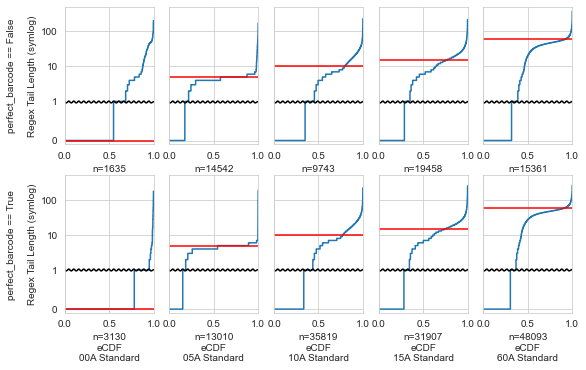

In [11]:
column_variable = "assignment"
row_variable = "perfect_barcode" # "perfect_barcode" or "mapped_to_end"
threshold = 1
sea.set_style("whitegrid")

plot_df = Nano3p.hit_df.sort_values("assignment").query('assignment != "30"')

n_rows = plot_df[row_variable].unique().shape[0]
n_cols = plot_df[column_variable].unique().shape[0]

fig, axes = plt.subplots(n_rows, n_cols, figsize=[8, 5], sharey='all')

for row_i, row in enumerate(axes):
    for i, assignment in enumerate(plot_df[column_variable].unique()):
        ax = row[i]
        subplot_df = plot_df.query(f'{column_variable} == "{assignment}"').query(f'{row_variable} == {row_i}')
        sea.ecdfplot(ax=ax,
                    data=subplot_df, y='regex_tail_len',
                    )
        ax.set_yscale("symlog",
                      linthresh=threshold,
                      )
        ax.set_ylim(-threshold/10, 500)
        # ax.yaxis.grid(which='minor')
        ax.axhline(int(assignment), color='r')
        with mpl.rc_context({'path.sketch': (1, 5, 1)}):
            ax.axhline(threshold, color='k')
        if i == 0:
            # ax.set_ylabel(f"Mapped to 'PolyA Site' = {bool(row_i)}\n\nTail Length")
            ax.set_ylabel(f"{row_variable} == {bool(row_i)}\n\nRegex Tail Length (symlog)")

        else:
            ax.set_ylabel("")
        
        ax.set_yticklabels([0, 1, 10, 100])
        if row_i == 1:
            ax.set_xlabel(f"n={subplot_df.shape[0]}\neCDF\n{assignment}A Standard")
        else:
            ax.set_xlabel(f"n={subplot_df.shape[0]}")

padding = 0.2
plt.tight_layout(pad=padding,
                 h_pad=padding, w_pad=padding,
                 )
plt.show()

/tmp/ipykernel_43340/2667758794.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/2667758794.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/2667758794.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/2667758794.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/2667758794.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/2667758794.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/2667758794.py:41: UserWarning: FixedFormatter should only be used t

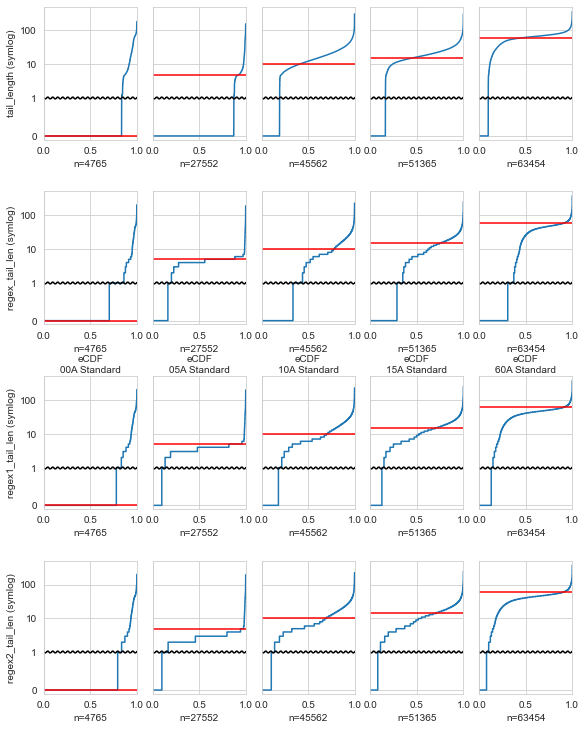

In [39]:
column_variable = "assignment"
row_variable = "regex or not" # "perfect_barcode" or "mapped_to_end"
threshold = 1
sea.set_style("whitegrid")

plot_df = Nano3p.hit_df.sort_values("assignment").query('assignment != "30"')

n_rows = 4  # plot_df[row_variable].unique().shape[0]
n_cols = plot_df[column_variable].unique().shape[0]

fig, axes = plt.subplots(n_rows, n_cols, figsize=[8, (2.5*n_rows)], sharey='all')

for row_i, row in enumerate(axes):
    for i, assignment in enumerate(plot_df[column_variable].unique()):
        ax = row[i]
        if row_i == 0:
            y_axis = "tail_length"
        elif row_i == 1:
            y_axis = "regex_tail_len"
        else:
            y_axis = f"regex{row_i -1}_tail_len"
        subplot_df = plot_df.query(f'{column_variable} == "{assignment}"')
        sea.ecdfplot(ax=ax,
                    data=subplot_df, y=y_axis,
                    )
        ax.set_yscale("symlog",
                      linthresh=threshold,
                      )
        ax.set_ylim(-threshold/10, 500)
        # ax.yaxis.grid(which='minor')
        ax.axhline(int(assignment), color='r')
        with mpl.rc_context({'path.sketch': (1, 5, 1)}):
            ax.axhline(threshold, color='k')
        if i == 0:
            # ax.set_ylabel(f"Mapped to 'PolyA Site' = {bool(row_i)}\n\nTail Length")
            ax.set_ylabel(f"{y_axis} (symlog)")

        else:
            ax.set_ylabel("")
        
        ax.set_yticklabels([0, 1, 10, 100])
        if row_i == 1:
            ax.set_xlabel(f"n={subplot_df.shape[0]}\neCDF\n{assignment}A Standard")
        else:
            ax.set_xlabel(f"n={subplot_df.shape[0]}")
padding = 0.2
plt.tight_layout(pad=padding,
                 h_pad=padding, w_pad=padding,
                 )
plt.savefig(f"{get_dt(for_file=True)}_tailfindr-v-regex_ecdfs_regexSteps.png")
plt.show()

In [75]:
testing_df = plot_df.query("assignment == '05'")

# By removing everything the mapped to the reference, I can effectively "trim" the standard sequence, and then look at the remains!
testing_df['unmapped_start_seq'] = testing_df.apply(lambda row: row['sequence'][:row['q_st']], axis=1)
testing_df['mapped_start_seq'] = testing_df.apply(lambda row: row['sequence'][row['q_st']:row['q_st']+25], axis=1)
testing_df[['assignment', 'perfect_barcode', 'tail_length', 'regex_tail_len', 'regex1_tail_len', 'regex2_tail_len', 'q_st', 'q_en', 'sequence', 'unmapped_start_seq', 'mapped_start_seq']].query("regex2_tail_len == 0")

,assignment,perfect_barcode,tail_length,regex_tail_len,regex1_tail_len,regex2_tail_len,q_st,q_en,sequence,unmapped_start_seq,mapped_start_seq
220381,05,False,NaN,0.0,0.0,0.0,0,473,CAGCACAGCACAGCTTCTTTCTTTACCGCTGAGCTGACCGCTGGTC...,,CAGCACAGCACAGCTTCTTTCTTTA
194888,05,False,5.18,2.0,1.0,0.0,12,510,TTGCTGTCGCATACTTATTGCTGGCTGAGCTGAACTACAAATAACT...,TTGCTGTCGCAT,ACTTATTGCTGGCTGAGCTGAACTA
43632,05,False,0.00,0.0,0.0,0.0,9,522,ACCTTTTTTAGCACAGCACAGCACAGCGCAGCTGCCGGCTGAGCTG...,ACCTTTTTT,AGCACAGCACAGCACAGCGCAGCTG
118207,05,False,0.00,0.0,0.0,0.0,4,465,GAGCAGCACAGCACAACACAACAACACCGCTGAGCTGAATGTCGGA...,GAGC,AGCACAGCACAACACAACAACACCG
220431,05,False,0.00,1.0,0.0,0.0,29,545,TGCTGTTTTGCTGGCACAACTGCTTCCTGTGCCGGCTGAGCTGAAA...,TGCTGTTTTGCTGGCACAACTGCTTCCTG,TGCCGGCTGAGCTGAAAATGGCACT
...,...,...,...,...,...,...,...,...,...,...,...
188433,05,True,NaN,0.0,0.0,0.0,0,515,AGCACAGCACAACTGCCCTTATTGCCGGCTGAGCTGAGCTGTGCTC...,,AGCACAGCACAACTGCCCTTATTGC
139997,05,True,0.00,2.0,1.0,0.0,3,332,TTGGCACAGCACAGCACAGCCCTTATTGCCGGCTGAGCTGAGGCAG...,TTG,GCACAGCACAGCACAGCCCTTATTG
143837,05,False,0.00,2.0,1.0,0.0,2,530,TTAGCACAGCACAACGCCCTTATTGCCAGCTGAGCTGACTTGCGGT...,TT,AGCACAGCACAACGCCCTTATTGCC
140845,05,False,0.00,2.0,1.0,0.0,9,544,TTGCTTCTGGCACAGCACAGCACTTGTGCCGGCTGAGCTGAGCGAG...,TTGCTTCTG,GCACAGCACAGCACTTGTGCCGGCT


In [88]:
test_df = Nano3p.hit_df[['assignment','sequence']]
test_df[['softclip', 'tail']] = Nano3p.hit_df.sequence.str.extract(r"(^.*?)(T+)")

# test_df["test"] = Nano3p.hit_df.sequence.str.extract(r"(^.*?)T+")
test_df

,assignment,sequence,softclip,tail
2,60,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...
3,60,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTAG...,,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
4,15,TTTTTTTTAGCACAGCAGCACCCTAGAAGGGCTGAGCTGATTTTAC...,,TTTTTTTT
5,60,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...
6,60,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
...,...,...,...,...
233673,15,CAACTTTTTTTTTTTTTTTTTTTAGCACAGCACAGCACAGCACCTA...,CAAC,TTTTTTTTTTTTTTTTTTT
233674,15,TTTTTTTTTTTTTTTAGCACAGCACAGCACAGCACCTAGAAGGGCT...,,TTTTTTTTTTTTTTT
233675,10,GTTTTAACTGGCAGCAGAGCACGGACGATAGCTGAGCTGAGTCGGT...,G,TTTT
233676,05,TTTTTAGCACAGCACAGCACAGCACTTATTGCCATTTGCTGAATGG...,,TTTTT


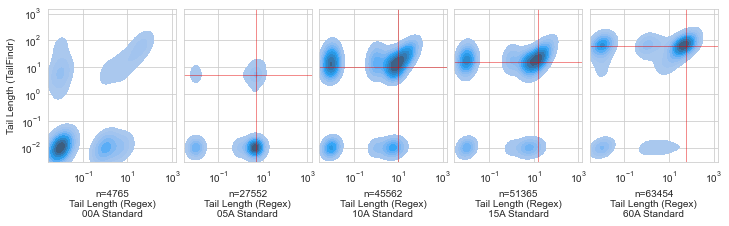

In [89]:
column_variable = "assignment"
threshold = 1
sea.set_style("whitegrid")

plot_df = Nano3p.hit_df.sort_values("assignment").query('assignment != "30"')

# Very very cool trick to get even subsampling!!
# plot_df = plot_df.groupby("assignment").sample(n=4000, random_state=1)

n_cols = plot_df[column_variable].unique().shape[0]

fig, axes = plt.subplots(1, n_cols, figsize=[10, 3], sharey='all', sharex='all')

for i, assignment in enumerate(plot_df[column_variable].unique()):
    ax = axes[i]
    subplot_df = plot_df.query(f'{column_variable} == "{assignment}"')
    subplot_df['regex_tail_len'] += 0.01
    subplot_df['tail_length'] += 0.01
    sea.kdeplot(ax=ax,
                data=subplot_df,
                x='regex_tail_len', y='tail_length',
                # bins=15,
                log_scale=[True, True],
                fill=True,
                )
    # ax.set_yscale("log")
    # ax.set_xscale("log")
    ax.axhline(int(assignment), linewidth=0.5, color=(0.9, 0, 0, 0.9))
    ax.axvline(int(assignment), linewidth=0.5, color=(0.9, 0, 0, 0.9))
    if i == 0:
        # ax.set_ylabel(f"Mapped to 'PolyA Site' = {bool(row_i)}\n\nTail Length")
        ax.set_ylabel(f"Tail Length (TailFindr)")

    else:
        ax.set_ylabel("")
    ax.set_xlabel(f"n={subplot_df.shape[0]}\nTail Length (Regex)\n{assignment}A Standard")
padding = 0.2
plt.tight_layout(pad=padding,
                 h_pad=padding, w_pad=padding,
                 )
# plt.savefig(f"{get_dt(for_file=True)}_tailfindr-v-regex_scatter.png")
plt.show()

## Decision tree for which tail call to use

In [22]:
def pick_better_tail_call(tail_cutoff, **row):
    regex_tail = row['regex_tail_len']
    tailfindr_tail = row['tail_length']
    if tailfindr_tail > tail_cutoff:
        return tailfindr_tail, 'tailfindr'
    else:
        return regex_tail, 'regex'

Picking better tail call: 100%|██████████| 193093/193093 [00:12<00:00, 15222.70it/s]
/tmp/ipykernel_43340/2426232715.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/2426232715.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/2426232715.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/2426232715.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/2426232715.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tmp/ipykernel_43340/2426232715.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 10, 100])
/tm

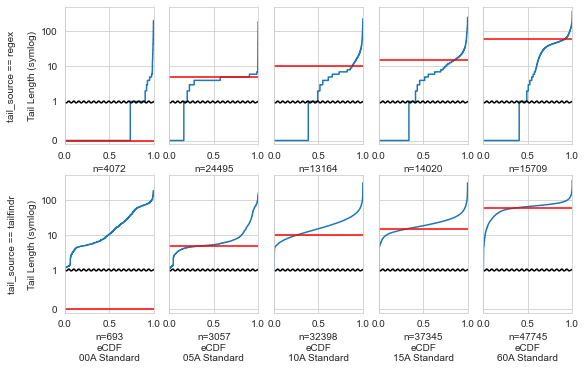

In [40]:
tailfindr_cutoff = 1

tqdm.pandas(desc='Picking better tail call')
Nano3p.hit_df[['final_tail_len', 'tail_source']] = Nano3p.hit_df.progress_apply(lambda row: pick_better_tail_call(tailfindr_cutoff, **row), axis=1, result_type='expand')


column_variable = "assignment"
row_variable = "tail_source" # "perfect_barcode" or "mapped_to_end"
threshold = 1
sea.set_style("whitegrid")

plot_df = Nano3p.hit_df.sort_values("assignment").query('assignment != "30"')

unique_row_values = list(plot_df[row_variable].unique())
n_rows = len(unique_row_values)
n_cols = plot_df[column_variable].unique().shape[0]

fig, axes = plt.subplots(n_rows, n_cols, figsize=[8, 5], sharey='all')

for row_i, row in enumerate(axes):
    row_value = unique_row_values[row_i]
    for i, assignment in enumerate(plot_df[column_variable].unique()):
        ax = row[i]
        subplot_df = plot_df.query(f'{column_variable} == "{assignment}"').query(f'{row_variable} == "{row_value}"')
        sea.ecdfplot(ax=ax,
                    data=subplot_df, y='final_tail_len',
                    )
        ax.set_yscale("symlog",
                      linthresh=threshold,
                      )
        ax.set_ylim(-threshold/10, 500)
        # ax.yaxis.grid(which='minor')
        ax.axhline(int(assignment), color='r')
        with mpl.rc_context({'path.sketch': (1, 5, 1)}):
            ax.axhline(threshold, color='k')
        if i == 0:
            # ax.set_ylabel(f"Mapped to 'PolyA Site' = {bool(row_i)}\n\nTail Length")
            ax.set_ylabel(f"{row_variable} == {row_value}\n\nTail Length (symlog)")

        else:
            ax.set_ylabel("")
        
        ax.set_yticklabels([0, 1, 10, 100])
        if row_i == 1:
            ax.set_xlabel(f"n={subplot_df.shape[0]}\neCDF\n{assignment}A Standard")
        else:
            ax.set_xlabel(f"n={subplot_df.shape[0]}")

padding = 0.2
plt.tight_layout(pad=padding,
                 h_pad=padding, w_pad=padding,
                 )
plt.savefig(f"{get_dt(for_file=True)}_tailfindr-and-regex_ecdfs_finalTailChoices.png")
plt.show()

In [32]:
Nano3p.hit_df.query("final_tail_len == 0")

,read_id,assignment,sequence,mappy_hit_obj,q_st,q_en,strand,ctg,ctg_len,r_st,r_en,mlen,blen,mapq,tp,ts,cigar,Unnamed: 0,read_type,tail_start,tail_end,samples_per_nt,tail_length,file_path,perfect_barcode,regex_tail_len,final_tail_len,tail_source
38,90e454f9-0ab6-48f9-9113-92730ddf7796,60,AACACCCTCCTCTTGCTGAGCTGTCCGACGCTCTTCTCTTGCTTGG...,2\t511\t-\tENO2_finalStandard_60Tail\t662\t117...,2,511,-,ENO2_finalStandard_60Tail,662,117,645,493,522,32,tp:A:P,ts:A:.,44M1D32M5D115M2D58M1I11M7D95M1I43M1D29M1D38M2D...,43088,contains_no_polyT_tail,NaN,NaN,7.49,0.0,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,0.0,0.0,regex
45,a8098adf-3725-4ad6-8029-c475f79e8b13,15,CTTAGCACAGCACAGCACAGCACCTAGAAGGGCTGAGCTGACATGA...,3\t534\t-\tENO2_finalStandard_15Tail\t662\t122...,3,534,-,ENO2_finalStandard_15Tail,662,122,662,504,539,57,tp:A:P,ts:A:.,20M3D5M2I45M2D3M1D35M2D3M1I67M2D13M1I95M1D29M2...,43108,contains_no_polyT_tail,NaN,NaN,7.87,0.0,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,0.0,0.0,regex
50,0820a6a4-18e8-460f-bfee-e7efb3848bea,10,GCTTTTTTTTTTTTTTTTTTTTTAGCACAGCAGCACAGCGCAGCAC...,30\t499\t-\tENO2_finalStandard_10Tail\t662\t17...,30,499,-,ENO2_finalStandard_10Tail,662,177,658,429,480,60,tp:A:P,ts:A:.,47M1D18M3D48M1D79M1D5M3D1M1D63M2D4M1D2M3I26M2I...,43019,qc_failed,NaN,NaN,8.77,NaN,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,0.0,0.0,regex
62,9f57d77f-2588-470a-aa0c-1ecbfa9ca461,60,GTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTGCT...,48\t369\t-\tENO2_finalStandard_60Tail\t662\t33...,48,369,-,ENO2_finalStandard_60Tail,662,336,657,305,317,42,tp:A:P,ts:A:.,41M1I37M2I80M1I120M3D23M1D16M,43058,qc_failed,NaN,NaN,11.00,NaN,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,0.0,0.0,regex
73,021fec22-63cf-4ef9-9012-066ba6d8c9b1,05,CTTTTTAGCACAGCTTTAGCACTTATTGCCGGCTGAGCTGAAGTTC...,6\t405\t-\tENO2_finalStandard_05Tail\t662\t237...,6,405,-,ENO2_finalStandard_05Tail,662,237,657,369,420,50,tp:A:P,ts:A:.,32M4I3M5D7M2D1M1I7M1I13M7D1M1I4M1D7M1D101M5D60...,43096,contains_no_polyT_tail,NaN,NaN,14.43,0.0,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,0.0,0.0,regex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233644,2fc5d48d-9b63-4def-b8b1-d39e99ca6a04,10,GTTTTTTTTTTTTTAGCACAGCACAACTTTTAACTTTGGACGATTA...,37\t546\t-\tENO2_finalStandard_10Tail\t662\t12...,37,546,-,ENO2_finalStandard_10Tail,662,123,642,485,517,0,tp:A:S,ts:A:.,111M3D140M1D26M1I7M2I2M2D4M2D14M1D11M2D38M1I43...,294355,qc_failed,NaN,NaN,7.88,NaN,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,0.0,0.0,regex
233648,906af4ee-b1aa-47e0-802c-9be05596b1c4,00,AGCACAGCACAGCACAACAACACCGCTGAGCTGATTAGTTCTTCTC...,0\t523\t-\tENO2_finalStandard_00Tail\t662\t117...,0,523,-,ENO2_finalStandard_00Tail,662,117,657,490,543,60,tp:A:P,ts:A:.,10M4D14M1I28M1D26M2D2M2D159M2D24M1I1M3I5M1D2M1...,294361,qc_failed,NaN,NaN,8.12,NaN,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,0.0,0.0,regex
233658,4a835581-1698-4854-a27c-a79d406426d4,10,CCACCAGCACGGACGATTAGCTGGGCTGAGGTTTAGCATCTTCTCT...,4\t504\t-\tENO2_finalStandard_10Tail\t662\t123...,4,504,-,ENO2_finalStandard_10Tail,662,123,648,450,527,23,tp:A:P,ts:A:.,45M3D7M2I3M1I50M3D6M3D52M1D1M1D12M1D3M2D3M1D4M...,294393,contains_no_polyT_tail,NaN,NaN,8.36,0.0,/data16/marcus/working/221028_nanoporeRun_ENO2...,True,0.0,0.0,regex
233659,78b63c1f-8156-44bb-9bea-ae0924dd5270,15,CTTTTTTTTTTTTAGCACAGCACAGCACAGCACCCTAGAGGGCTGA...,13\t530\t-\tENO2_finalStandard_15Tail\t662\t11...,13,530,-,ENO2_finalStandard_15Tail,662,117,662,493,538,59,tp:A:P,ts:A:.,45M3D5M1D41M1I12M1D21M3D77M1D6M2D47M2D20M13D3M...,294400,qc_failed,NaN,NaN,7.94,NaN,/data16/marcus/working/221028_nanoporeRun_ENO2...,False,0.0,0.0,regex
